# Preliminaries


In [1]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report

import os


tensorflow version 2.9.1
sklearn: 1.1.2


In [2]:
def dataLoad_old():
    test = pd.read_csv('data/Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('data/Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('data/Real_Tomorrow/validation_real_tom_target.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'][['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [3]:
def dataLoad_old_48H():
    test = pd.read_csv('data/Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('data/Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('data/Real_Tomorrow/validation_real_tom_target.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    def tom_generate(df):
        new_traning_sets = df
        new_traning_sets['Real_tom_lsm48'] = new_traning_sets['Real_tom_lsm']
        for i in range(0,int((new_traning_sets.shape[0]/377)-1)):
            j=i+1
            each_row2 = new_traning_sets.iloc[377*j:377*(j+1),:]
            new_traning_sets.iloc[377*i:377*(i+1),14:15] = each_row2['Real_tom_lsm'].values
        print("======== Done ========")
        return new_traning_sets

    train = tom_generate(train)
    test = tom_generate(test)
    val = tom_generate(val)
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm48']]
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'][['Real_tom_lsm48']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm48']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [4]:
def dataLoad_old_24_48H():
    test = pd.read_csv('data/Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('data/Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('data/Real_Tomorrow/validation_real_tom_target.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    def tom_generate(df):
        new_traning_sets = df
        new_traning_sets['Real_tom_lsm48'] = new_traning_sets['Real_tom_lsm']
        for i in range(0,int((new_traning_sets.shape[0]/377)-1)):
            j=i+1
            each_row2 = new_traning_sets.iloc[377*j:377*(j+1),:]
            new_traning_sets.iloc[377*i:377*(i+1),14:15] = each_row2['Real_tom_lsm'].values
        print("======== Done ========")
        return new_traning_sets

    train = tom_generate(train)
    test = tom_generate(test)
    val = tom_generate(val)
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train.apply(lambda x: 1 if x.Real_tom_lsm ==1 or x.Real_tom_lsm48 == 1 else 0,axis=1)
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'].apply(lambda x: 1 if x.Real_tom_lsm ==1 or x.Real_tom_lsm48 == 1 else 0,axis=1)
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val.apply(lambda x: 1 if x.Real_tom_lsm ==1 or x.Real_tom_lsm48 == 1 else 0,axis=1)
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [5]:
def dataLoad():
    test = pd.read_csv('data/realtarget_shear/test_with_shear.csv')
    train = pd.read_csv('data/realtarget_shear/training_with_shear.csv')
    val = pd.read_csv('data/realtarget_shear/valid_with_shear.csv')

    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    
    def threshold(x):
        if x >= 50.0:
            return 1.0
        else:
            return 0.0

    # apply the function to the "Real_tom_target" column
    train['Real_tom_target'] = train['Real_tom_target'].apply(threshold)
    test['Real_tom_target'] = test['Real_tom_target'].apply(threshold)
    val['Real_tom_target'] = val['Real_tom_target'].apply(threshold)
    
    print(train.head())
    print(train.shape)
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_target']]
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'][['Real_tom_target']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_target']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test


In [6]:
def standard(x_train,x_val,x_test):
    X_train_stand = x_train #smote
    X_valid_stand = x_val #smote
    X_test_stand = x_test #smote



    num_cols = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst', 'shear']

    # apply standardization on numerical features
    for i in num_cols:

        # fit on training data column
        scale = StandardScaler().fit(X_train_stand[[i]])

        # transform the training data column
        X_train_stand[i] = scale.transform(X_train_stand[[i]])

        # transform the training data column
        X_valid_stand[i] = scale.transform(X_valid_stand[[i]])   

        # transform the testing data column
        X_test_stand[i] = scale.transform(X_test_stand[[i]])
    
    return X_train_stand,X_valid_stand,X_test_stand

# Load, standardization and SMOTE on data

In [7]:
x_train_old, y_train_old, x_val_old, y_val_old, x_test_old, y_test_old = dataLoad_old()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [8]:
x_train_old_st, x_val_old_st, x_test_old_st = standard(x_train_old, x_val_old, x_test_old)

In [9]:
x_train_old48, y_train_old48, x_val_old48, y_val_old48, x_test_old48, y_test_old48 = dataLoad_old_48H()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
======== Done ========
======== Done ========
======== Done ========
******training features******


In [10]:
x_train_old48_st, x_val_old48_st, x_test_old48_st = standard(x_train_old48, x_val_old48, x_test_old48)

In [11]:
x_train_old24_48, y_train_old24_48, x_val_old24_48, y_val_old24_48, x_test_old24_48, y_test_old24_48 = dataLoad_old_24_48H()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
======== Done ========
======== Done ========
======== Done ========
******training features******


In [12]:
x_train_old24_48_st, x_val_old24_48_st, x_test_old24_48_st = standard(x_train_old24_48, x_val_old24_48, x_test_old24_48)

In [13]:
x_train_new, y_train_new, x_val_new, y_val_new, x_test_new, y_test_new = dataLoad()


         time  latitude  longitude        vo          r     u_200     u_850  \
0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660 -3.323872   
1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733 -2.844494   
2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676 -2.125244   
3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573 -1.122395   
4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505 -1.362953   

      v_200     v_850        ttr  sst  lsm  newlsm  new_target  \
0  1.687164 -1.823624 -247.54074  0.0  0.0     0.0         0.0   
1  1.060593 -1.991425 -240.00592  0.0  0.0     0.0         0.0   
2  3.280617 -1.931789 -223.76889  0.0  0.0     0.0         0.0   
3  5.743889 -1.243538 -235.55556  0.0  0.0     0.0         0.0   
4  6.514030 -0.954163 -254.03260  0.0  0.0     0.0         0.0   

   Real_tom_target     shear  
0              0.0  6.302023  
1              0.0  5.039517  
2              0.0  5.275516  
3   

In [14]:
x_train_new_st, x_val_new_st, x_test_new_st = standard(x_train_new, x_val_new, x_test_new)

# FFNN

> datasets with new targets = 
    x_train_new, y_train_new, x_val_new, y_val_new, x_test_new, y_test_new 
>>put _st means scaled datasets

> datasets with the target 1 if 24 or 48h later will Occur a cyclone = 
    x_train_old24_48, y_train_old24_48, x_val_old24_48, y_val_old24_48, x_test_old24_48, y_test_old24_48
>>put _st means scaled datasets

> datasets with the target 1 if 24-48h later will Occur a cyclone = 
    x_train_old48, y_train_old48, x_val_old48, y_val_old48, x_test_old48, y_test_old48
>>put _st means scaled datasets

> datasets with the target 1 if 24h later will Occur a cyclone = 
    x_train_old, y_train_old, x_val_old, y_val_old, x_test_old, y_test_old = dataLoad_old()
>>put _st means scaled datasets


# FFNN, new data

In [94]:

model_std_relu_dropout = Sequential()
model_std_relu_dropout.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout.add(Dropout(0.5))
model_std_relu_dropout.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


2023-03-09 11:03:10.486405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [95]:
model_std_relu_dropout.fit(x_train_new_st,y_train_new,validation_data=(x_val_new_st,y_val_new),
        callbacks=[monitor],epochs=50)

Epoch 1/50
265686/265686 [==============================] - 169s 632us/step - loss: 0.3311 - val_loss: 0.3103
Epoch 2/50
265686/265686 [==============================] - 168s 633us/step - loss: 0.3216 - val_loss: 0.3113
Epoch 3/50
265686/265686 [==============================] - 171s 643us/step - loss: 0.3170 - val_loss: 0.3031
Epoch 4/50
265686/265686 [==============================] - 182s 684us/step - loss: 0.3138 - val_loss: 0.3169
Epoch 5/50
265686/265686 [==============================] - 179s 675us/step - loss: 0.3108 - val_loss: 0.2939
Epoch 6/50
265686/265686 [==============================] - 175s 660us/step - loss: 0.3087 - val_loss: 0.2777
Epoch 7/50
265686/265686 [==============================] - 177s 666us/step - loss: 0.3067 - val_loss: 0.2895
Epoch 8/50
265686/265686 [==============================] - 176s 663us/step - loss: 0.3048 - val_loss: 0.2753
Epoch 9/50
265686/265686 [==============================] - 172s 647us/step - loss: 0.3036 - val_loss: 0.3043
Epoch 10/5

29053/29053 [==============================] - 10s 346us/step

-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  dense
Layer:  dropout
Layer:  dense_1

---------- Evaluation on Training Data ----------
              precision    recall  f1-sc

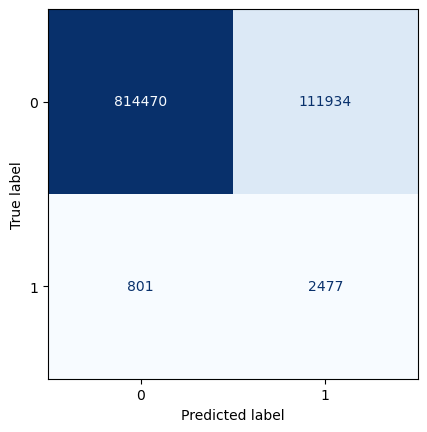

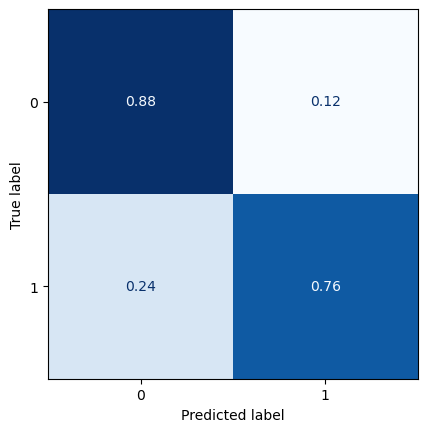

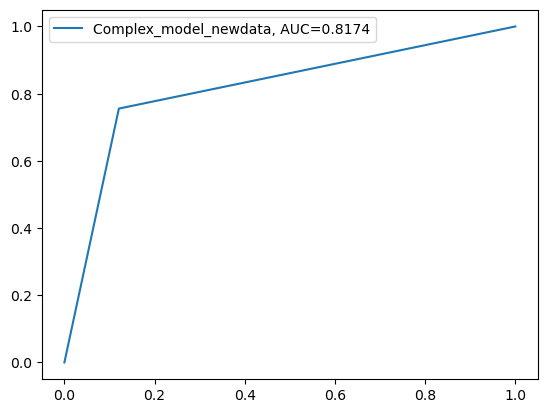

In [106]:
##### Step 6 - Use model to make predictions
modelz = model_std_relu_dropout
x_training = x_train_new_st
y_training = y_train_new
x_test = x_test_new
y_test = y_test_new

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="Complex_model_newdata, AUC="+str(auc))





#add legend
plt.legend()

In [102]:

model_std_relu_dropout.save(os.path.join("data/model_1l_512n_relu_dropout_std_newData.h5"))

# Different Model, new data

In [103]:
### as an example, try different ones
model2 = Sequential()
model2.add(Dense(9, input_dim=9, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1,activation='sigmoid')) # Output
model2.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 16)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [104]:
model2.fit(x_train_new_st,y_train_new,validation_data=(x_val_new_st,y_val_new),
        callbacks=[monitor],epochs=50)

Epoch 1/50
265686/265686 [==============================] - 201s 754us/step - loss: 0.4240 - val_loss: 0.4504
Epoch 2/50
265686/265686 [==============================] - 197s 740us/step - loss: 0.4106 - val_loss: 0.4244
Epoch 3/50
265686/265686 [==============================] - 198s 743us/step - loss: 0.4052 - val_loss: 0.2293
Epoch 4/50
265686/265686 [==============================] - 191s 718us/step - loss: 0.4030 - val_loss: 0.2284
Epoch 5/50
265686/265686 [==============================] - 192s 723us/step - loss: 0.4016 - val_loss: 0.3040
Epoch 6/50
265686/265686 [==============================] - 191s 718us/step - loss: 0.4006 - val_loss: 0.1937
Epoch 7/50
265686/265686 [==============================] - 190s 714us/step - loss: 0.4000 - val_loss: 0.0910
Epoch 8/50
265686/265686 [==============================] - 190s 714us/step - loss: 0.3991 - val_loss: 0.1970
Epoch 9/50
265686/265686 [==============================] - 191s 719us/step - loss: 0.3994 - val_loss: 0.2226
Epoch 10/5

29053/29053 [==============================] - 11s 392us/step

-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 16)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
 

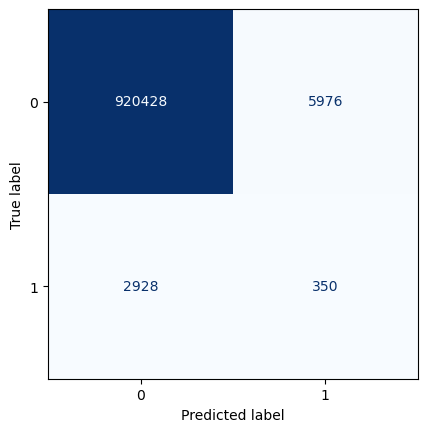

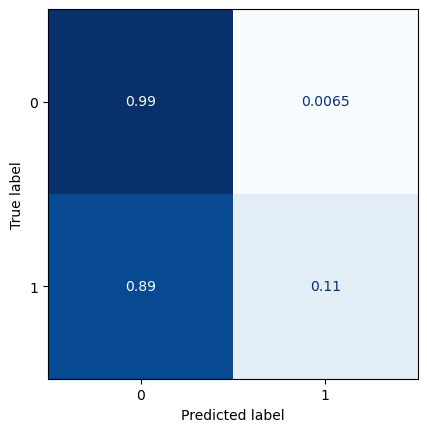

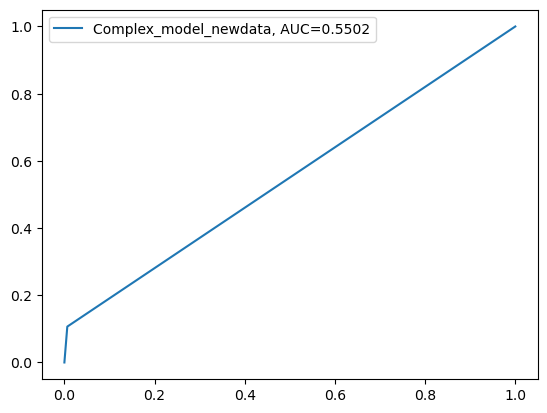

In [110]:
##### Step 6 - Use model to make predictions
modelz = model2
x_training = x_train_new_st
y_training = y_train_new
x_test = x_test_new_st
y_test = y_test_new

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="Complex_model_newdata, AUC="+str(auc))





#add legend
plt.legend()


modelz.save(os.path.join("data/complex_model_std_newData.h5"))

# complex model 4l 256n, new target

In [125]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_256n_4n_newtarget = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_256n_4n_newtarget.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


h_model_FFNN_256n_4n_newtarget = model_FFNN_256n_4n_newtarget.fit(x_train_new_st,y_train_new, epochs = 25, callbacks=[model_checkpoint_callback],  validation_data=(x_val_new_st,y_val_new))#*********more epochs = 5


Epoch 1/25
265686/265686 [==============================] - 423s 2ms/step - loss: 0.2724 - accuracy: 0.8798 - val_loss: 0.2668 - val_accuracy: 0.8708
Epoch 2/25
265686/265686 [==============================] - 429s 2ms/step - loss: 0.2410 - accuracy: 0.8975 - val_loss: 0.2436 - val_accuracy: 0.8841
Epoch 3/25
265686/265686 [==============================] - 438s 2ms/step - loss: 0.2310 - accuracy: 0.9032 - val_loss: 0.2381 - val_accuracy: 0.8822
Epoch 4/25
265686/265686 [==============================] - 437s 2ms/step - loss: 0.2257 - accuracy: 0.9062 - val_loss: 0.2431 - val_accuracy: 0.8840
Epoch 5/25
265686/265686 [==============================] - 421s 2ms/step - loss: 0.2230 - accuracy: 0.9075 - val_loss: 0.2665 - val_accuracy: 0.8736
Epoch 6/25
265686/265686 [==============================] - 419s 2ms/step - loss: 0.2200 - accuracy: 0.9092 - val_loss: 0.2403 - val_accuracy: 0.8847
Epoch 7/25
265686/265686 [==============================] - 417s 2ms/step - loss: 0.2179 - accuracy:

In [126]:
model_FFNN_256n_4n_newtarget.save(os.path.join("data/complex4l256n_model_std_new.h5"))


29053/29053 [==============================] - 19s 637us/step

-------------------- Model Summary --------------------
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 Hidden-Layer1 (Dense)       (None, 256)               2560      
                                                                 
 Hidden-Layer2 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer3 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer4 (Dense)       (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
 

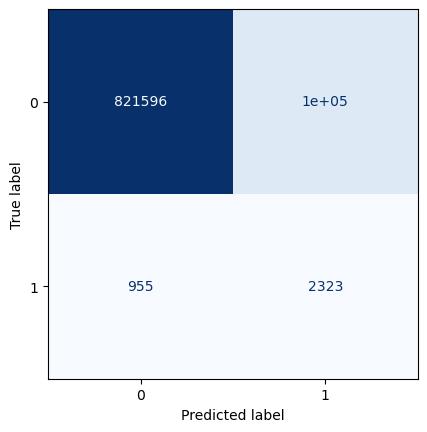

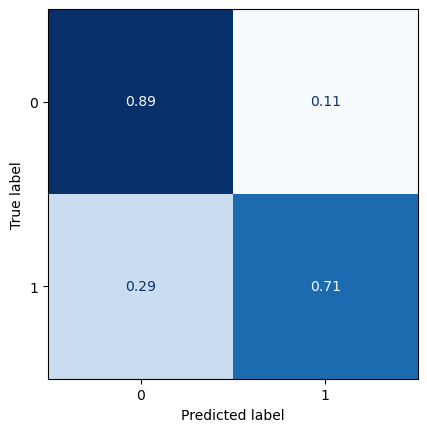

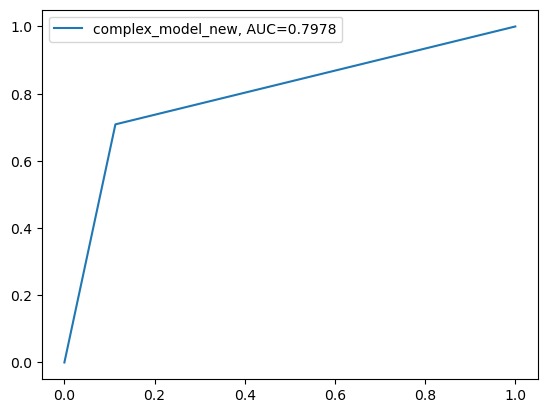

In [127]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_256n_4n_newtarget
x_training = x_train_new_st
y_training = y_train_new
x_test = x_test_new_st
y_test = y_test_new

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="complex_model_new, AUC="+str(auc))





#add legend
plt.legend()

# Old target, next 24 hours
> x_train_old, y_train_old, x_val_old, y_val_old, x_test_old, y_test_old = dataLoad_old()

In [107]:
model_std_relu_dropout_24H_old = Sequential()
model_std_relu_dropout_24H_old.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout_24H_old.add(Dropout(0.5))
model_std_relu_dropout_24H_old.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_24H_old.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_24H_old.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               5120      
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_std_relu_dropout_24H_old.fit(x_train_old_st,y_train_old,validation_data=(x_val_old_st, y_val_old),
        callbacks=[monitor],epochs=50)


Epoch 1/50
266255/266255 [==============================] - 177s 664us/step - loss: 0.2164 - val_loss: 0.2040
Epoch 2/50
266255/266255 [==============================] - 171s 643us/step - loss: 0.2049 - val_loss: 0.2015
Epoch 3/50
266255/266255 [==============================] - 172s 646us/step - loss: 0.2003 - val_loss: 0.1790
Epoch 4/50
266255/266255 [==============================] - 173s 651us/step - loss: 0.1971 - val_loss: 0.1833
Epoch 5/50
266255/266255 [==============================] - 168s 631us/step - loss: 0.1942 - val_loss: 0.1909
Epoch 6/50
266255/266255 [==============================] - 169s 634us/step - loss: 0.1924 - val_loss: 0.1658
Epoch 7/50
266255/266255 [==============================] - 169s 635us/step - loss: 0.1905 - val_loss: 0.2060
Epoch 8/50
266255/266255 [==============================] - 170s 640us/step - loss: 0.1891 - val_loss: 0.1795
Epoch 9/50
266255/266255 [==============================] - 170s 639us/step - loss: 0.1878 - val_loss: 0.1620
Epoch 10/5

15787/15787 [==============================] - 6s 348us/step

-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               5120      
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  dense_8
Layer:  dropout_2
Layer:  dense_9

---------- Evaluation on Training Data ----------
              precision    recall  

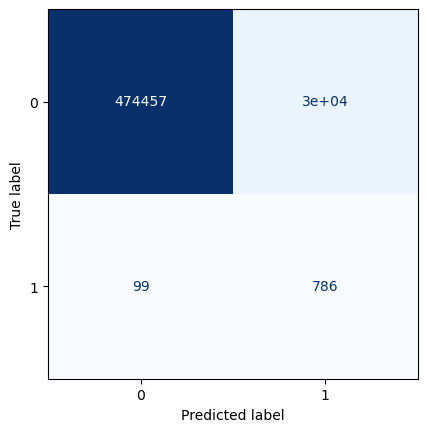

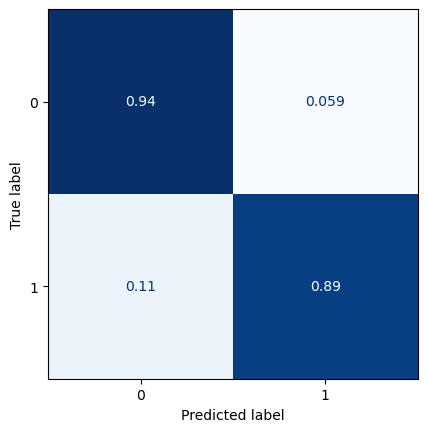

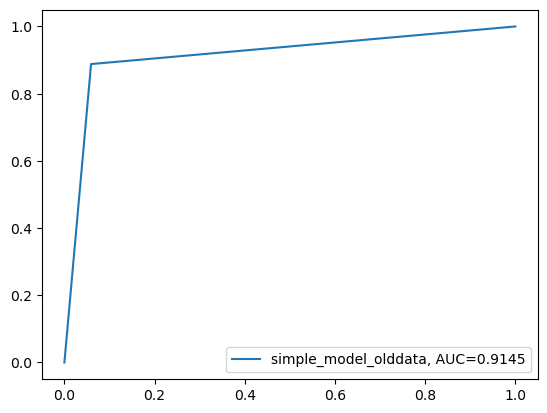

In [109]:
##### Step 6 - Use model to make predictions
modelz = model_std_relu_dropout_24H_old
x_training = x_train_old_st
y_training = y_train_old
x_test = x_test_old_st
y_test =  y_test_old

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="simple_model_olddata, AUC="+str(auc))





#add legend
plt.legend()

# Different Model, 24H


In [111]:
### as an example, try different ones
modelcom_24h = Sequential()
modelcom_24h.add(Dense(9, input_dim=9, activation='relu'))
modelcom_24h.add(Dropout(0.5))
modelcom_24h.add(Dense(16, activation='relu'))
modelcom_24h.add(Dense(32, activation='relu'))
modelcom_24h.add(Dense(64, activation='relu'))
modelcom_24h.add(Dense(128, activation='relu'))
modelcom_24h.add(Dense(1,activation='sigmoid')) # Output
modelcom_24h.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

modelcom_24h.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 9)                 90        
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_11 (Dense)            (None, 16)                160       
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 1)                

In [112]:
modelcom_24h.fit(x_train_old_st,y_train_old,validation_data=(x_val_old_st, y_val_old),
        callbacks=[monitor],epochs=50)

Epoch 1/50
266255/266255 [==============================] - 191s 715us/step - loss: 0.3155 - val_loss: 0.7838
Epoch 2/50
266255/266255 [==============================] - 190s 713us/step - loss: 0.3048 - val_loss: 0.9848
Epoch 3/50
266255/266255 [==============================] - 189s 711us/step - loss: 0.3016 - val_loss: 1.0468
Epoch 4/50
266255/266255 [==============================] - 193s 725us/step - loss: 0.2995 - val_loss: 1.6332
Epoch 5/50
266255/266255 [==============================] - 190s 715us/step - loss: 0.2965 - val_loss: 2.4196
Epoch 6/50
266255/266255 [==============================] - 192s 721us/step - loss: 0.2958 - val_loss: 2.2858
Epoch 6: early stopping


15787/15787 [==============================] - 6s 387us/step

-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 9)                 90        
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_11 (Dense)            (None, 16)                160       
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
  

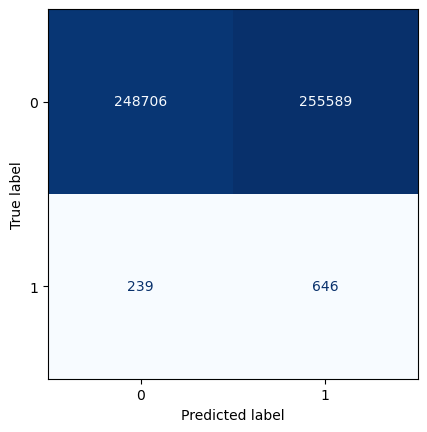

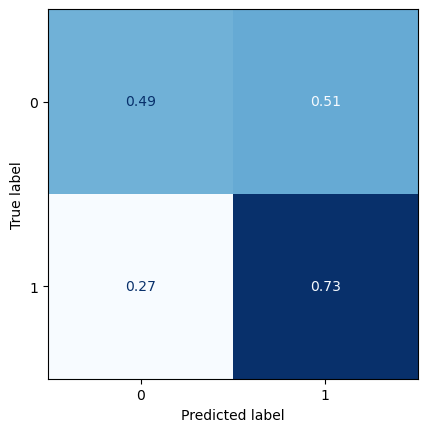

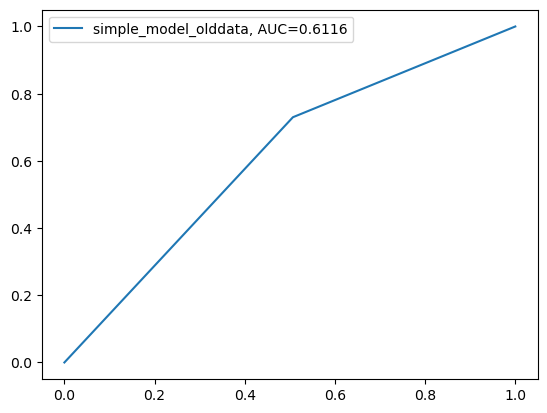

In [113]:
##### Step 6 - Use model to make predictions
modelz = modelcom_24h
x_training = x_train_old_st
y_training = y_train_old
x_test = x_test_old_st
y_test =  y_test_old

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="simple_model_olddata, AUC="+str(auc))





#add legend
plt.legend()

In [114]:
modelcom_24h.save(os.path.join("data/complex_model_std_24H.h5"))
model_std_relu_dropout_24H_old.save(os.path.join("data/model_std_relu_dropout_24H_old.h5"))


# complex model 4l 256n, 0-24H

In [20]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_256n_4n_0_24H = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_256n_4n_0_24H.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

h_model_FFNN_256n_4n_0_24H = model_FFNN_256n_4n_0_24H.fit(x_train_old_st,y_train_old, epochs = 50,  callbacks=[monitor],  validation_data=(x_val_old_st,  y_val_old))#*********more epochs = 5


Epoch 1/50
266255/266255 [==============================] - 426s 2ms/step - loss: 0.1443 - accuracy: 0.9446 - val_loss: 0.1323 - val_accuracy: 0.9460
Epoch 2/50
266255/266255 [==============================] - 415s 2ms/step - loss: 0.1184 - accuracy: 0.9572 - val_loss: 0.1571 - val_accuracy: 0.9372
Epoch 3/50
266255/266255 [==============================] - 410s 2ms/step - loss: 0.1130 - accuracy: 0.9596 - val_loss: 0.1469 - val_accuracy: 0.9408
Epoch 4/50
266255/266255 [==============================] - 416s 2ms/step - loss: 0.1100 - accuracy: 0.9610 - val_loss: 0.1388 - val_accuracy: 0.9460
Epoch 5/50
266255/266255 [==============================] - 449s 2ms/step - loss: 0.1072 - accuracy: 0.9621 - val_loss: 0.1289 - val_accuracy: 0.9461
Epoch 6/50
266255/266255 [==============================] - 411s 2ms/step - loss: 0.1053 - accuracy: 0.9632 - val_loss: 0.1309 - val_accuracy: 0.9500
Epoch 7/50
266255/266255 [==============================] - 412s 2ms/step - loss: 0.1036 - accuracy:

15787/15787 [==============================] - 10s 637us/step

-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 9)                 0         
                                                                 
 Hidden-Layer1 (Dense)       (None, 256)               2560      
                                                                 
 Hidden-Layer2 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer3 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer4 (Dense)       (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
 

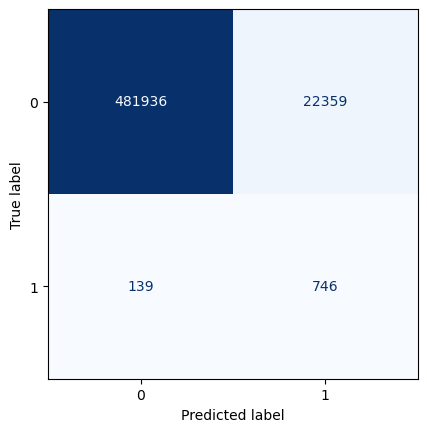

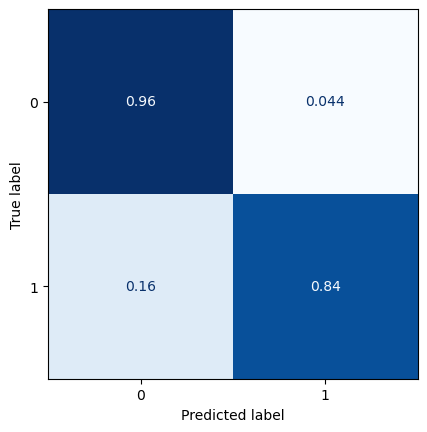

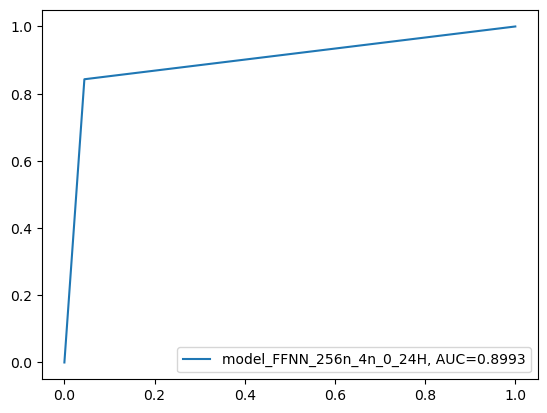

In [21]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_256n_4n_0_24H
x_training = x_train_old_st
y_training = y_train_old
x_test =  x_test_old_st
y_test = y_test_old

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="model_FFNN_256n_4n_0_24H, AUC="+str(auc))





#add legend
plt.legend()

In [22]:
model_FFNN_256n_4n_0_24H.save(os.path.join("data/model_FFNN_256n_4n_0_24H.h5"))


# Old target, next 48 hours
> x_train_old48, y_train_old48, x_val_old48, y_val_old48, x_test_old48, y_test_old48

In [115]:
model_std_relu_dropout_48H_old = Sequential()
model_std_relu_dropout_48H_old.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout_48H_old.add(Dropout(0.5))
model_std_relu_dropout_48H_old.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_48H_old.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_48H_old.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               5120      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [116]:
model_std_relu_dropout_48H_old.fit(x_train_old48_st,y_train_old48,validation_data=(x_val_old48_st, y_val_old48),
        callbacks=[monitor],epochs=50)


Epoch 1/50
266255/266255 [==============================] - 176s 661us/step - loss: 0.3526 - val_loss: 0.3469
Epoch 2/50
266255/266255 [==============================] - 174s 654us/step - loss: 0.3358 - val_loss: 0.3054
Epoch 3/50
266255/266255 [==============================] - 173s 650us/step - loss: 0.3284 - val_loss: 0.3035
Epoch 4/50
266255/266255 [==============================] - 171s 643us/step - loss: 0.3233 - val_loss: 0.2914
Epoch 5/50
266255/266255 [==============================] - 170s 637us/step - loss: 0.3195 - val_loss: 0.3311
Epoch 6/50
266255/266255 [==============================] - 171s 643us/step - loss: 0.3165 - val_loss: 0.3097
Epoch 7/50
266255/266255 [==============================] - 171s 640us/step - loss: 0.3141 - val_loss: 0.2958
Epoch 8/50
266255/266255 [==============================] - 169s 635us/step - loss: 0.3119 - val_loss: 0.3103
Epoch 9/50
266255/266255 [==============================] - 168s 632us/step - loss: 0.3100 - val_loss: 0.2914
Epoch 9: e

15787/15787 [==============================] - 6s 349us/step

-------------------- Model Summary --------------------
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               5120      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  dense_16
Layer:  dropout_4
Layer:  dense_17

---------- Evaluation on Training Data ----------
              precision    recall

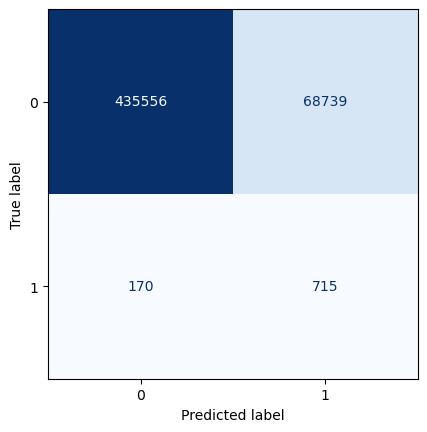

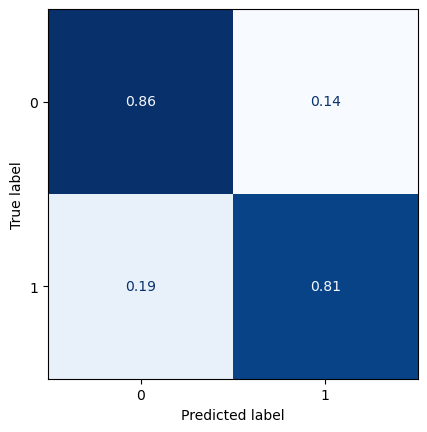

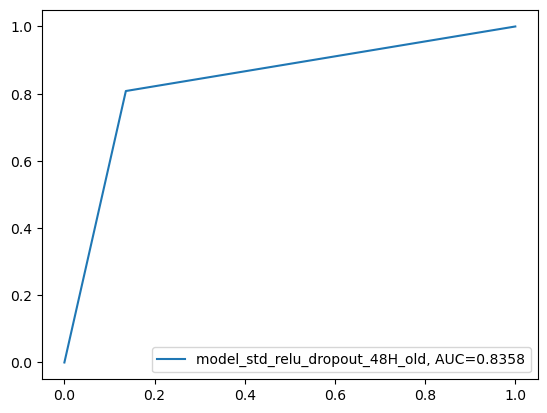

In [117]:
##### Step 6 - Use model to make predictions
modelz = model_std_relu_dropout_48H_old
x_training = x_train_old48_st
y_training = y_train_old48
x_test = x_test_old48_st
y_test =  y_test_old48

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="model_std_relu_dropout_48H_old, AUC="+str(auc))





#add legend
plt.legend()
model_std_relu_dropout_48H_old.save(os.path.join("data/model_std_relu_dropout_48H_old.h5"))


# Different Model, 48H

In [118]:
### as an example, try different ones
modelcom_48h = Sequential()
modelcom_48h.add(Dense(9, input_dim=9, activation='relu'))
modelcom_48h.add(Dropout(0.5))
modelcom_48h.add(Dense(16, activation='relu'))
modelcom_48h.add(Dense(32, activation='relu'))
modelcom_48h.add(Dense(64, activation='relu'))
modelcom_48h.add(Dense(128, activation='relu'))
modelcom_48h.add(Dense(1,activation='sigmoid')) # Output
modelcom_48h.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

modelcom_48h.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 9)                 90        
                                                                 
 dropout_5 (Dropout)         (None, 9)                 0         
                                                                 
 dense_19 (Dense)            (None, 16)                160       
                                                                 
 dense_20 (Dense)            (None, 32)                544       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 1)                

In [119]:
modelcom_48h.fit(x_train_old48_st,y_train_old48,validation_data=(x_val_old48_st, y_val_old48),
        callbacks=[monitor],epochs=50)

Epoch 1/50
266255/266255 [==============================] - 195s 730us/step - loss: 0.4510 - val_loss: 0.4370
Epoch 2/50
266255/266255 [==============================] - 201s 755us/step - loss: 0.4376 - val_loss: 0.3107
Epoch 3/50
266255/266255 [==============================] - 199s 748us/step - loss: 0.4342 - val_loss: 0.2316
Epoch 4/50
266255/266255 [==============================] - 205s 771us/step - loss: 0.4325 - val_loss: 0.1699
Epoch 5/50
266255/266255 [==============================] - 205s 768us/step - loss: 0.4315 - val_loss: 0.1573
Epoch 6/50
266255/266255 [==============================] - 221s 830us/step - loss: 0.4310 - val_loss: 0.0960
Epoch 7/50
266255/266255 [==============================] - 205s 771us/step - loss: 0.4307 - val_loss: 0.1119
Epoch 8/50
266255/266255 [==============================] - 198s 745us/step - loss: 0.4305 - val_loss: 0.0930
Epoch 9/50
266255/266255 [==============================] - 189s 709us/step - loss: 0.4306 - val_loss: 0.0894
Epoch 10/5

15787/15787 [==============================] - 6s 392us/step

-------------------- Model Summary --------------------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 9)                 90        
                                                                 
 dropout_5 (Dropout)         (None, 9)                 0         
                                                                 
 dense_19 (Dense)            (None, 16)                160       
                                                                 
 dense_20 (Dense)            (None, 32)                544       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
  

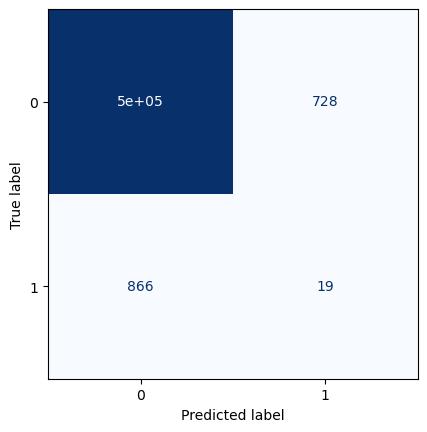

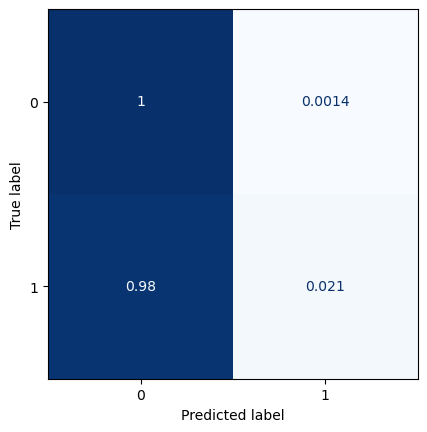

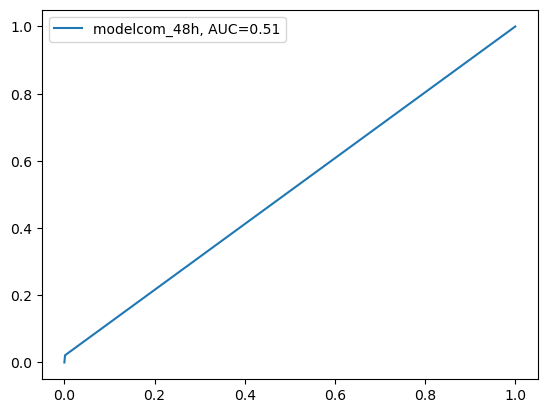

In [120]:
##### Step 6 - Use model to make predictions
modelz = modelcom_48h
x_training = x_train_old48_st
y_training = y_train_old48
x_test = x_test_old48_st
y_test =  y_test_old48

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="modelcom_48h, AUC="+str(auc))





#add legend
plt.legend()
model_std_relu_dropout_48H_old.save(os.path.join("data/modelcom_48h.h5"))


# complex model 4l 256n, 24-48H

In [15]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_256n_4n_24_48H = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_256n_4n_24_48H.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

h_model_FFNN_256n_4n_24_48H = model_FFNN_256n_4n_24_48H.fit(x_train_old48_st,y_train_old48, epochs = 50,  callbacks=[monitor],  validation_data=(x_val_old48_st, y_val_old48))#*********more epochs = 5


2023-03-10 10:54:39.686863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
266255/266255 [==============================] - 416s 2ms/step - loss: 0.2333 - accuracy: 0.9054 - val_loss: 0.2006 - val_accuracy: 0.9089
Epoch 2/50
266255/266255 [==============================] - 435s 2ms/step - loss: 0.1895 - accuracy: 0.9280 - val_loss: 0.2228 - val_accuracy: 0.9043
Epoch 3/50
266255/266255 [==============================] - 425s 2ms/step - loss: 0.1801 - accuracy: 0.9324 - val_loss: 0.2234 - val_accuracy: 0.9018
Epoch 4/50
266255/266255 [==============================] - 411s 2ms/step - loss: 0.1740 - accuracy: 0.9351 - val_loss: 0.2261 - val_accuracy: 0.9058
Epoch 5/50
266255/266255 [==============================] - 409s 2ms/step - loss: 0.1703 - accuracy: 0.9369 - val_loss: 0.2228 - val_accuracy: 0.9095
Epoch 6/50
266255/266255 [==============================] - 413s 2ms/step - loss: 0.1673 - accuracy: 0.9381 - val_loss: 0.2041 - val_accuracy: 0.9128
Epoch 6: early stopping


In [16]:
model_FFNN_256n_4n_24_48H.save(os.path.join("data/model_FFNN_256n_4n_24_48H.h5"))


15787/15787 [==============================] - 10s 641us/step

-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 Hidden-Layer1 (Dense)       (None, 256)               2560      
                                                                 
 Hidden-Layer2 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer3 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer4 (Dense)       (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
   

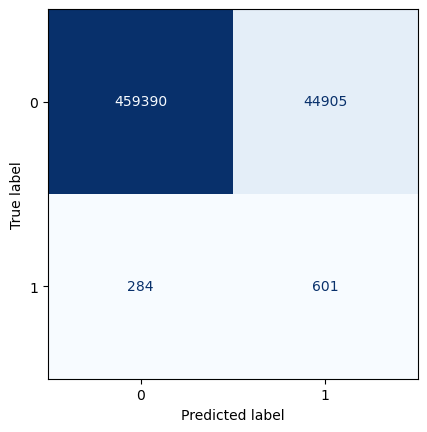

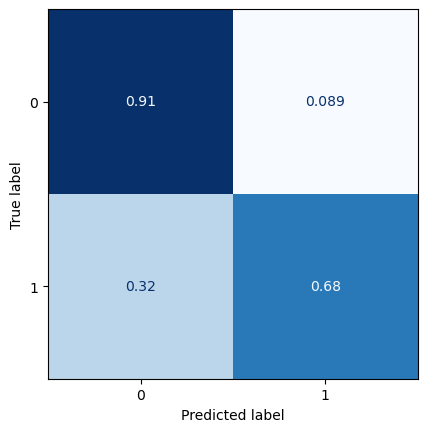

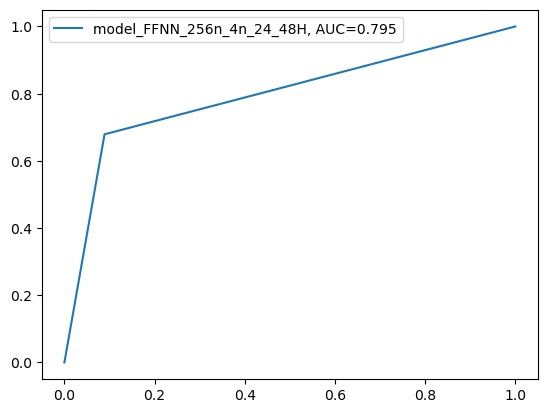

In [17]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_256n_4n_24_48H
x_training = x_train_old48_st
y_training = y_train_old48
x_test = x_test_old48_st
y_test = y_test_old48

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="model_FFNN_256n_4n_24_48H, AUC="+str(auc))





#add legend
plt.legend()

# FFNN, 24 or 48H  
> x_train_old24_48, y_train_old24_48, x_val_old24_48, y_val_old24_48, x_test_old24_48, y_test_old24_48

In [121]:
model_std_relu_dropout_24_48H_old = Sequential()
model_std_relu_dropout_24_48H_old.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout_24_48H_old.add(Dropout(0.5))
model_std_relu_dropout_24_48H_old.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_24_48H_old.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_24_48H_old.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               5120      
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [122]:
model_std_relu_dropout_24_48H_old.fit(x_train_old24_48_st,y_train_old24_48,validation_data=(x_val_old24_48_st, y_val_old24_48),
        callbacks=[monitor],epochs=50)

Epoch 1/50
265961/265961 [==============================] - 173s 651us/step - loss: 0.3153 - val_loss: 0.2930
Epoch 2/50
265961/265961 [==============================] - 171s 643us/step - loss: 0.3036 - val_loss: 0.2756
Epoch 3/50
265961/265961 [==============================] - 172s 646us/step - loss: 0.2981 - val_loss: 0.2987
Epoch 4/50
265961/265961 [==============================] - 172s 648us/step - loss: 0.2941 - val_loss: 0.2903
Epoch 5/50
265961/265961 [==============================] - 172s 646us/step - loss: 0.2910 - val_loss: 0.2745
Epoch 6/50
265961/265961 [==============================] - 173s 649us/step - loss: 0.2884 - val_loss: 0.2717
Epoch 7/50
265961/265961 [==============================] - 171s 643us/step - loss: 0.2862 - val_loss: 0.2869
Epoch 8/50
265961/265961 [==============================] - 172s 645us/step - loss: 0.2846 - val_loss: 0.2639
Epoch 9/50
265961/265961 [==============================] - 173s 652us/step - loss: 0.2830 - val_loss: 0.2671
Epoch 10/5

15787/15787 [==============================] - 6s 354us/step

-------------------- Model Summary --------------------
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               5120      
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  dense_24
Layer:  dropout_6
Layer:  dense_25

---------- Evaluation on Training Data ----------
              precision    recall

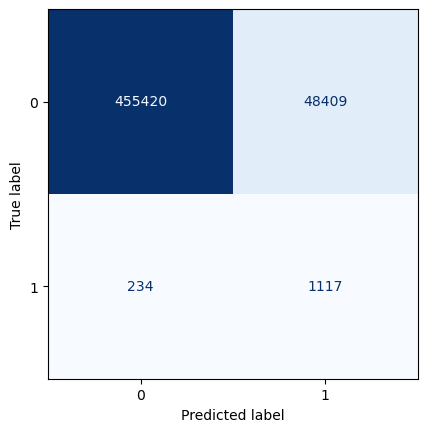

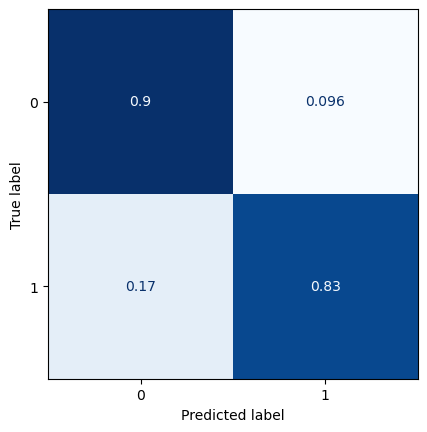

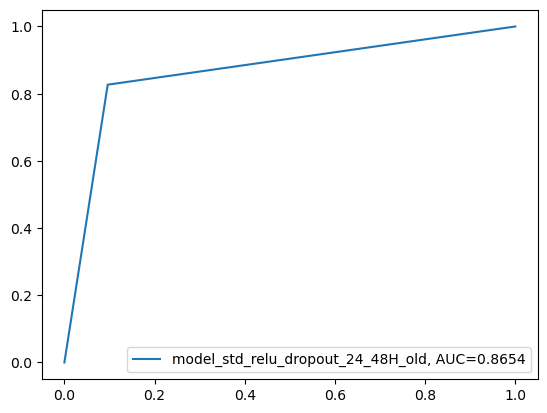

In [123]:
##### Step 6 - Use model to make predictions
modelz = model_std_relu_dropout_24_48H_old
x_training = x_train_old24_48_st
y_training = y_train_old24_48
x_test = x_test_old24_48_st
y_test =  y_test_old24_48

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="model_std_relu_dropout_24_48H_old, AUC="+str(auc))





#add legend
plt.legend()
model_std_relu_dropout_24_48H_old.save(os.path.join("data/model_std_relu_dropout_24_48H_old.h5"))


# complex model 4l 256n, 0-24 or 24-48H

In [18]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_256n_4n_0_48H = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_256n_4n_0_48H.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

h_model_FFNN_256n_4n_0_48H = model_FFNN_256n_4n_0_48H.fit(x_train_old24_48_st,y_train_old24_48, epochs = 50,  callbacks=[monitor],  validation_data=(x_val_old24_48_st,  y_val_old24_48))#*********more epochs = 5


Epoch 1/50
265961/265961 [==============================] - 419s 2ms/step - loss: 0.2374 - accuracy: 0.8992 - val_loss: 0.2500 - val_accuracy: 0.8795
Epoch 2/50
265961/265961 [==============================] - 433s 2ms/step - loss: 0.1998 - accuracy: 0.9196 - val_loss: 0.2498 - val_accuracy: 0.8926
Epoch 3/50
265961/265961 [==============================] - 450s 2ms/step - loss: 0.1894 - accuracy: 0.9250 - val_loss: 0.2293 - val_accuracy: 0.9016
Epoch 4/50
265961/265961 [==============================] - 432s 2ms/step - loss: 0.1829 - accuracy: 0.9283 - val_loss: 0.2306 - val_accuracy: 0.8987
Epoch 5/50
265961/265961 [==============================] - 427s 2ms/step - loss: 0.1793 - accuracy: 0.9301 - val_loss: 0.2227 - val_accuracy: 0.9020
Epoch 6/50
265961/265961 [==============================] - 431s 2ms/step - loss: 0.1770 - accuracy: 0.9312 - val_loss: 0.2258 - val_accuracy: 0.9009
Epoch 7/50
265961/265961 [==============================] - 411s 2ms/step - loss: 0.1741 - accuracy:

15787/15787 [==============================] - 10s 637us/step

-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 Hidden-Layer1 (Dense)       (None, 256)               2560      
                                                                 
 Hidden-Layer2 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer3 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer4 (Dense)       (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
 

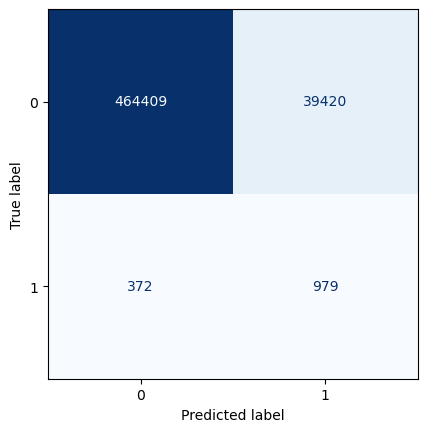

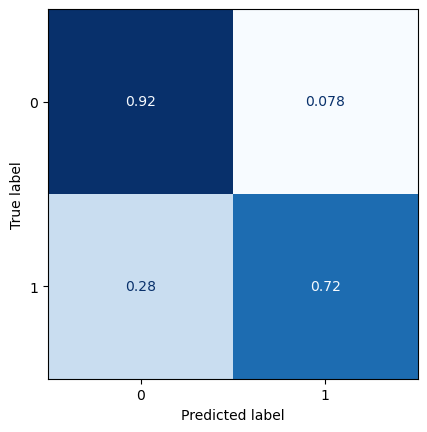

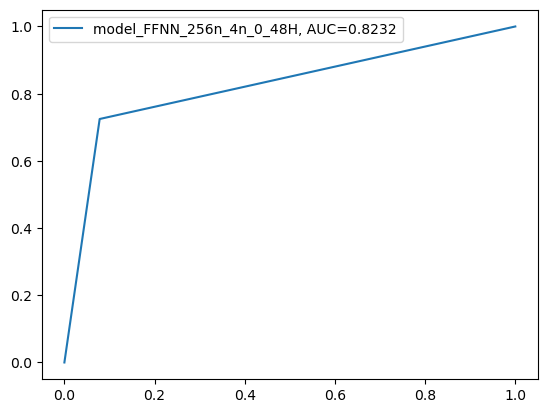

In [23]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_256n_4n_0_48H
x_training = x_train_old24_48_st
y_training = y_train_old24_48
x_test =  x_test_old24_48_st
y_test = y_test_old24_48

# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

print('---------- ROC Curve----------')

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="model_FFNN_256n_4n_0_48H, AUC="+str(auc))





#add legend
plt.legend()

In [ ]:
model_FFNN_256n_4n_0_48H.save(os.path.join("data/model_FFNN_256n_4n_0_48H.h5"))
